In [225]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats


In [253]:
# Load in csv
bitcoin_tweets_df = pd.read_csv("./Resources/df_Final.csv", sep=';')
bitcoin_tweets_df.head()

,Date,Compound_Score,Total Volume of Tweets,Count_Negatives,Count_Positives,Count_Neutrals,Sent_Negatives,Sent_Positives,Count_News,Count_Bots,Open,High,Low,Close,Volume (BTC),"Volume (Currency),,"
0,2017-08-01 00:00:00,0.082893,1027.0,139.0,347.0,397.0,-0.516620,0.417882,695.0,144.0,2855.81,2863.06,2823.00,2825.92,184.02,"522951,0,"
1,2017-08-01 01:00:00,0.053160,778.0,111.0,193.0,320.0,-0.423402,0.415385,493.0,154.0,2823.01,2860.02,2821.01,2853.38,77.3,"219605.16,,"
2,2017-08-01 02:00:00,0.124251,836.0,89.0,273.0,264.0,-0.440938,0.428661,510.0,210.0,2846.27,2858.04,2837.31,2841.60,135.83,"386739.15,,"
3,2017-08-01 03:00:00,-0.021036,984.0,250.0,236.0,314.0,-0.441173,0.396034,683.0,184.0,2841.84,2863.88,2837.73,2862.93,143.2,"408360.03,,"
4,2017-08-01 04:00:00,0.055437,751.0,114.0,195.0,305.0,-0.414978,0.417159,517.0,137.0,2862.92,2876.00,2848.11,2874.99,222.53,"637045.88,,"


In [212]:
# get end of day price and tweet count
end_price = bitcoin_tweets_df[bitcoin_tweets_df['Date'].str.contains('23:00:00')]
end_price['Close']

# remove ',,' and ',0,' from volume in dollars column
bitcoin_tweets_df['Volume (Currency),,'] = bitcoin_tweets_df['Volume (Currency),,'].str.replace(',,', ' ')
bitcoin_tweets_df['Volume (Currency),,'] = bitcoin_tweets_df['Volume (Currency),,'].str.replace(',0,', ' ')

In [213]:
# split date column by date and time
bitcoin_tweets_df[['Date', 'Time']] = bitcoin_tweets_df['Date'].str.split(' ', expand=True)

In [214]:
# get end of day closing price 
end_of_day = bitcoin_tweets_df[bitcoin_tweets_df['Time'].str.contains('23:00:00')]


In [251]:
total_negative = bitcoin_tweets_df.groupby('Date')['Count_Negatives'].sum()
total_positive = bitcoin_tweets_df.groupby('Date')['Count_Positives'].sum()
total_neutral = bitcoin_tweets_df.groupby('Date')['Count_Neutrals'].sum()
close_price = end_of_day.set_index('Date')['Close']
tweet_vol = bitcoin_tweets_df.groupby('Date')['Total Volume of Tweets'].sum()
date = bitcoin_tweets_df['Date'].unique()
# trading_vol = bitcoin_tweets_df.groupby('Date')['Volume (Currency),,'].sum().astype(float)

tweets_dict = {'Closing Price': close_price, 
               'Positive Tweets': total_positive, 
               'Negative Tweets': total_negative, 
               'Neutral Tweets': total_neutral, 
               'Total Volume of Tweets': tweet_vol}

tweets_df = pd.DataFrame(tweets_dict)
tweets_df

,Closing Price,Positive Tweets,Negative Tweets,Neutral Tweets,Total Volume of Tweets
Date,,,,,
2017-08-01,2731.00,6471.0,4701.0,12089.0,30802.0
2017-08-02,2703.51,4734.0,2732.0,9063.0,23726.0
2017-08-03,2793.37,5351.0,3233.0,9806.0,25111.0
2017-08-04,2855.00,4150.0,2703.0,7959.0,21863.0
2017-08-05,3263.62,6258.0,2115.0,8731.0,22123.0
...,...,...,...,...,...
2019-01-17,3682.51,7202.0,3648.0,7294.0,21758.0
2019-01-18,3647.29,6999.0,3557.0,7631.0,23361.0
2019-01-19,3732.40,6474.0,2634.0,5650.0,18587.0


In [247]:
# plt.plot(date, close_price, color="green", label="BTC Price")
# plt.plot(date, total_negative, color="red", label="Negative Tweets")
# plt.plot(date, total_positive, color="blue", label="Postive Tweets")
# plt.plot(date, total_neutral, color="orange", label="Neutral Tweets")
# plt.figure(figsize=(20, 8))

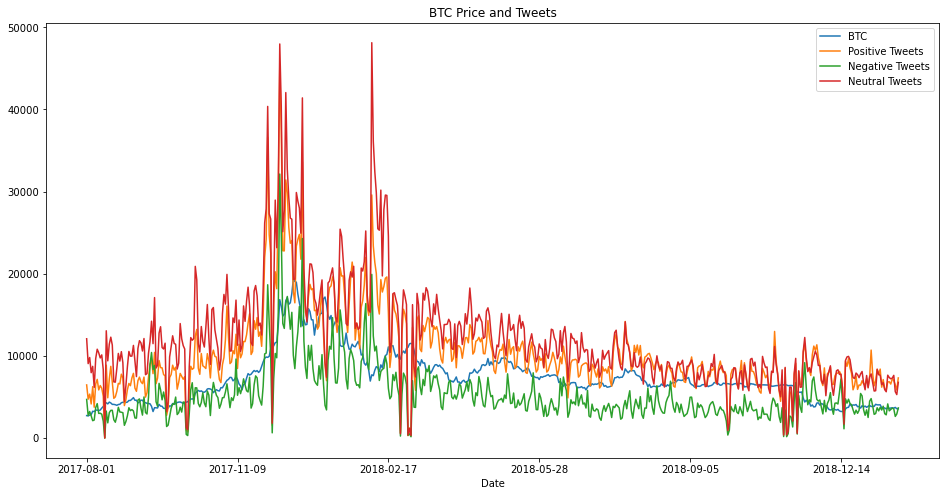

In [248]:
tweets_df['Closing Price'].plot(label='BTC', figsize=(16, 8), title='BTC Price and Tweets')
tweets_df['Positive Tweets'].plot(label='Positive Tweets')
tweets_df['Negative Tweets'].plot(label='Negative Tweets')
tweets_df['Neutral Tweets'].plot(label='Neutral Tweets')
plt.legend()
plt.show()

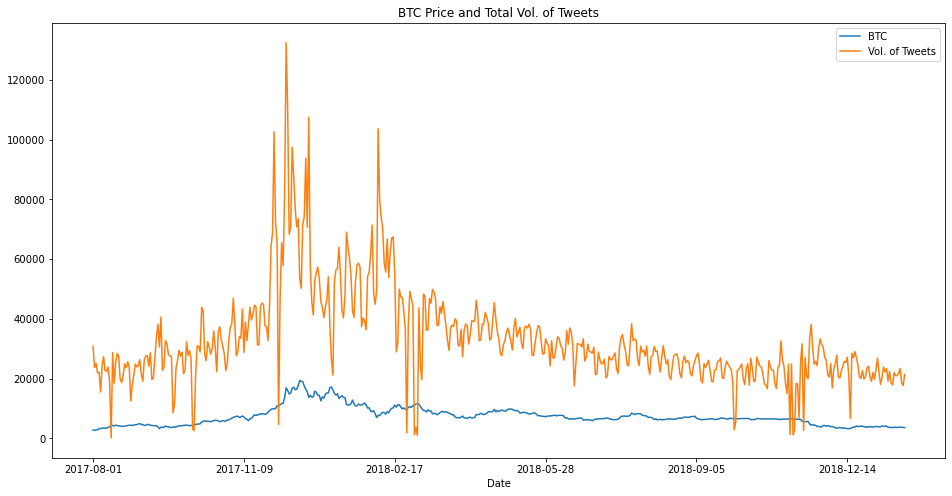

In [249]:
tweets_df['Closing Price'].plot(label='BTC', figsize=(16, 8), title='BTC Price and Total Vol. of Tweets')
tweets_df['Total Volume of Tweets'].plot(label='Vol. of Tweets')
plt.legend()
plt.show()

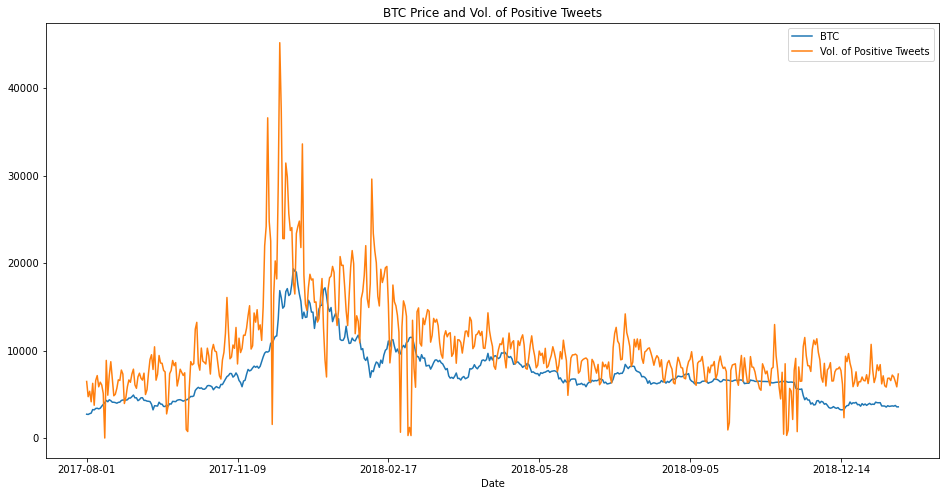

In [243]:
tweets_df['Closing Price'].plot(label='BTC', figsize=(16, 8), title='BTC Price and Vol. of Positive Tweets')
tweets_df['Positive Tweets'].plot(label='Vol. of Positive Tweets')
plt.legend()
plt.show()

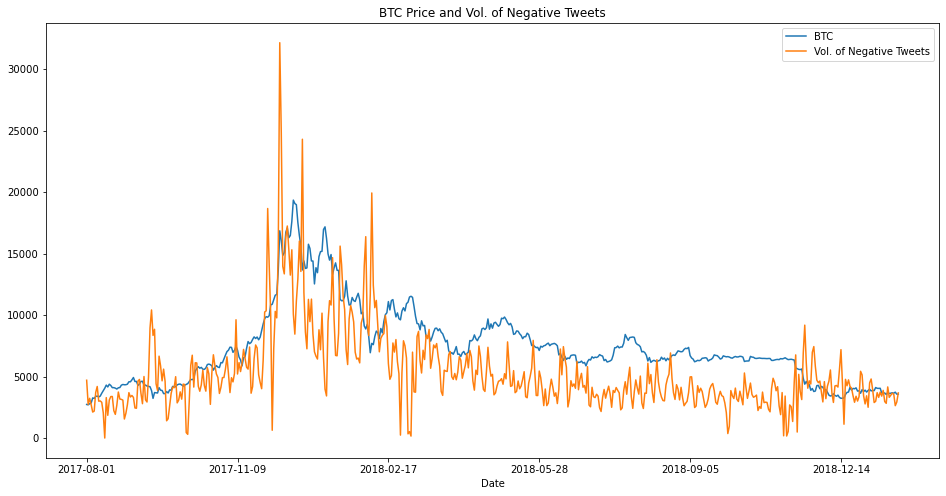

In [242]:
tweets_df['Closing Price'].plot(label='BTC', figsize=(16, 8), title='BTC Price and Vol. of Negative Tweets')
tweets_df['Negative Tweets'].plot(label='Vol. of Negative Tweets')
plt.legend()
plt.show()

0.6159866102416166

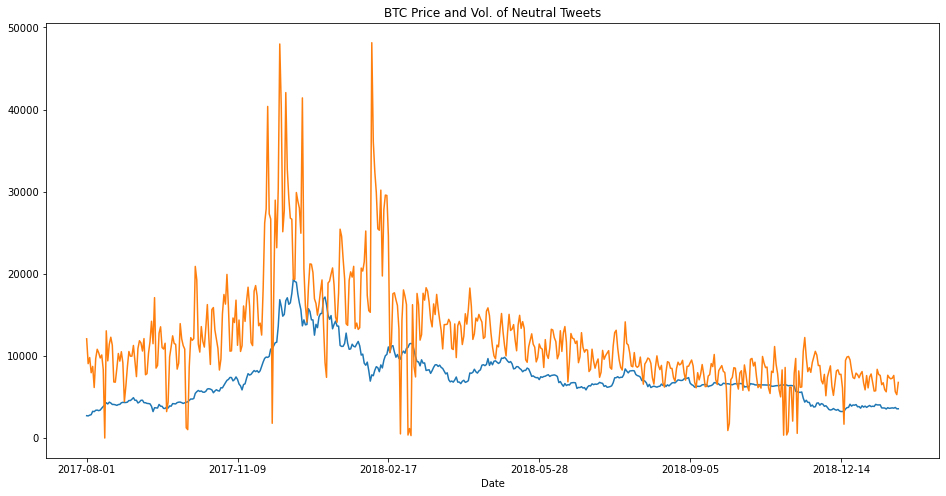

In [257]:
tweets_df['Closing Price'].plot(label='BTC', figsize=(16, 8), title='BTC Price and Vol. of Neutral Tweets')
tweets_df['Neutral Tweets'].plot(label='Vol. of Neutral Tweets')
correlation = tweets_df['Neutral Tweets'].corr(tweets_df['Closing Price'])


In [222]:
year = bitcoin_tweets_df.iloc[:, 0]

0        2017-08-01
1        2017-08-01
2        2017-08-01
3        2017-08-01
4        2017-08-01
            ...    
12931    2019-01-21
12932    2019-01-21
12933    2019-01-21
12934    2019-01-21
12935    2019-01-21
Name: Date, Length: 12936, dtype: object

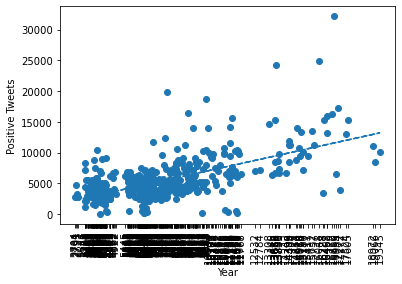

In [244]:
# postive tweets
year = tweets_df.iloc[:, 0]
positive_tweets = tweets_df.iloc[:, 2]
negative_tweets = tweets_df.iloc[:, 3]
btc_price = tweets_df.iloc[:, 1]
#neutral_tweets = tweets_df.iloc[:, 4]

pt_slope, pt_int, pt_r, pt_p, pt_std_err = stats.linregress(
    year, postive_tweets)

pt_fit = pt_slope * year + pt_int

plt.scatter(year, positive_tweets)
plt.plot(year, pt_fit,"--") # dotted line
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Positive Tweets')
plt.show()
